In [0]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white", color_codes=True)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/internship/Internship

/content/drive/My Drive/internship/Internship


In [0]:
name=[]
for i in range(601):
    name.append('annot_chem4/akhand_b43_'+str(i)+'.xml')

In [0]:
imz_name=[]
for i in range(601):
    imz_name.append('images_chem4/akhand_b43_'+str(i)+'.jpg')

In [0]:
#This code is to extract the damage category(class label) from the xml file

import xml.etree.ElementTree as ET 

damage=[]

for i in range(601):
    xroot = ET.parse(name[i]).getroot()
    name1=[]
    t=[]
    for node in xroot: 
        name1 = node.find("name")
        if(name1 is not None):
            t=(name1.text)
            break
    if (t is not None):
        damage.append(t)
    
#print(damage)

In [0]:
d={'Damage':damage}

In [0]:
df=pd.DataFrame(d)

In [0]:
df.head()

,Damage
0,Shatter
1,Shatter
2,Scratch_or_spot
3,[]
4,Dislocation


In [0]:
#Output list consists of different types of damages category we have
output = []
for x in damage:
    if x not in output:
        output.append(x)
print (output)

['Shatter', 'Scratch_or_spot', [], 'Dislocation', 'Dent', 'Large_tear_or_damage', 'Tear', 'Large_dent']


In [0]:
#Out of different categories we will only use 2.
a=df.loc[(df['Damage'] == 'Scratch_or_spot')]
b=df.loc[(df['Damage'] == 'Dent')]
final=a.append(b)

In [0]:
s=final.index.tolist()
final=sorted(s)
print(final)

[2, 6, 11, 16, 19, 20, 24, 25, 26, 29, 35, 36, 40, 41, 43, 44, 45, 49, 50, 51, 52, 56, 57, 60, 61, 62, 64, 65, 67, 68, 73, 79, 84, 88, 93, 94, 101, 106, 109, 115, 119, 120, 123, 125, 126, 135, 137, 139, 143, 144, 147, 156, 171, 174, 175, 176, 177, 178, 179, 180, 183, 186, 194, 198, 204, 205, 206, 207, 208, 209, 215, 217, 220, 221, 222, 223, 225, 226, 227, 229, 234, 248, 249, 253, 254, 257, 262, 269, 271, 272, 275, 276, 284, 285, 287, 288, 289, 290, 295, 297, 300, 302, 305, 306, 308, 309, 310, 312, 315, 316, 317, 318, 319, 320, 321, 332, 341, 342, 343, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 356, 357, 358, 359, 360, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 381, 382, 383, 388, 389, 393, 394, 395, 396, 406, 407, 410, 414, 415, 416, 417, 418, 419, 420, 421, 425, 426, 430, 434, 439, 440, 441, 445, 448, 450, 457, 458, 466, 467, 468, 472, 475, 477, 486, 488, 494, 498, 499, 501, 502, 503, 507, 512, 519, 520, 522, 523, 526, 527, 528, 530, 531, 532, 533, 534, 53

In [0]:
damage_1=df.loc[list(a.index)]
damage_2=df.loc[list(b.index)]

In [0]:
from PIL import Image
import cv2

damage_1_image=[]
damage_2_image=[]

basewidth = 300
hsize = 200

for i in damage_1.index:
    img =Image.open(imz_name[i])
    wpercent = (basewidth/float(img.size[0]))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    damage_1_image.append(np.asarray(img))

for i in damage_2.index:
    img =Image.open(imz_name[i])
    wpercent = (basewidth/float(img.size[0]))
    img = img.resize((basewidth,hsize), Image.ANTIALIAS)
    damage_2_image.append(np.asarray(img))


In [0]:
imzz_1=np.expand_dims(damage_1_image[0], 0)
for i in range(len(damage_1_image)-1):
    a=np.expand_dims(damage_1_image[i+1], 0)
    imzz_1=np.vstack((imzz_1,a))

imzz_2=np.expand_dims(damage_2_image[0], 0)
for i in range(len(damage_2_image)-1):
    a=np.expand_dims(damage_2_image[i+1], 0)
    imzz_2=np.vstack((imzz_2,a))

In [0]:
len(imzz_1)

136

In [0]:
#This code is used for augmenting or adding more data to our dataset by using image augmentation techniques because we have very less data.
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

i=0
for batch in datagen.flow(imzz_1, batch_size=32,save_to_dir='dam_1', save_prefix=i, save_format='jpg'):
    i += 1
    if i >= 60:
        break 

i=0
for batch in datagen.flow(imzz_2, batch_size=32,save_to_dir='dam_2', save_prefix=i, save_format='jpg'):
    i += 1
    if i >= 60:
        break 

Using TensorFlow backend.


In [0]:
damage_1_image=[]
damage_2_image=[]


for i in os.listdir('dam_1'):
    p='dam_1/'+str(i)
    img =Image.open(p)
    damage_1_image.append(np.asarray(img))

for i in os.listdir('dam_2'):
    p='dam_2/'+str(i)
    img =Image.open(p)
    damage_2_image.append(np.asarray(img))


In [0]:
imzz_1=np.expand_dims(damage_1_image[0], 0)
for i in range(len(damage_1_image)-1):
    a=np.expand_dims(damage_1_image[i+1], 0)
    imzz_1=np.vstack((imzz_1,a))

imzz_2=np.expand_dims(damage_2_image[0], 0)
for i in range(len(damage_2_image)-1):
    a=np.expand_dims(damage_2_image[i+1], 0)
    imzz_2=np.vstack((imzz_2,a))

In [0]:
imz=np.vstack((imzz_1,imzz_2))
imz.shape

(3282, 200, 300, 3)

**After Image augmentation now we have 3282 different data points.**

**We came from 246 to 3282 data points.Now we can build our models on this data**

In [0]:
labels=np.array([0] * (len(imzz_1)) + [1] * (len(imzz_2)))

In [0]:
#Splitting the data into train & test 80:20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(imz, labels, test_size = 0.2,stratify =  labels)

In [0]:
x_test.shape

(657, 200, 300, 3)

In [0]:
batch_size=1
epochs=30

## Use VGG-16 trained model for transfer learning

In [0]:

from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

def save_bottlebeck_features():
    
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    bottleneck_features_train = model.predict(
        x_train)
    np.save(open('bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    bottleneck_features_validation = model.predict(
        x_test)
    np.save(open('bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)


Using TensorFlow backend.


In [0]:
def train_top_model():
    train_data = np.load(open('bottleneck_features_train.npy','rb'))
    
    validation_data = np.load(open('bottleneck_features_validation.npy','rb'))
    
    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    trained_model=model.fit(train_data, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, y_test),verbose=1)
    
    score = model.evaluate(validation_data, y_test, verbose=1,batch_size=1) 
    print('Test Loss:', score[0]) 
    print('Test AUC:', score[1])

    plt.plot(trained_model.history['acc'], 'r')
    plt.plot(trained_model.history['val_acc'], 'b')
    plt.xlabel("Epochs")
    plt.ylabel("ACC")
    plt.legend({'Train ACC': 'r', 'Test ACC':'b'})

    plt.show()
    


Train on 2625 samples, validate on 657 samples
Epoch 1/30
2625/2625 [==============================] - 18s 7ms/step - loss: 7.6732 - acc: 0.5101 - val_loss: 8.0958 - val_acc: 0.4977
Epoch 2/30
2625/2625 [==============================] - 16s 6ms/step - loss: 7.7345 - acc: 0.5059 - val_loss: 7.9236 - val_acc: 0.5084
Epoch 3/30
2625/2625 [==============================] - 15s 6ms/step - loss: 6.7885 - acc: 0.5653 - val_loss: 6.8381 - val_acc: 0.5616
Epoch 4/30
2625/2625 [==============================] - 15s 6ms/step - loss: 6.4299 - acc: 0.5813 - val_loss: 5.9736 - val_acc: 0.6058
Epoch 5/30
2625/2625 [==============================] - 15s 6ms/step - loss: 5.8703 - acc: 0.6091 - val_loss: 6.2628 - val_acc: 0.5890
Epoch 6/30
2625/2625 [==============================] - 16s 6ms/step - loss: 5.4504 - acc: 0.6251 - val_loss: 5.6683 - val_acc: 0.6180
Epoch 7/30
2625/2625 [==============================] - 15s 6ms/step - loss: 4.5918 - acc: 0.6427 - val_loss: 5.3166 - val_acc: 0.6149
Epoch 8/

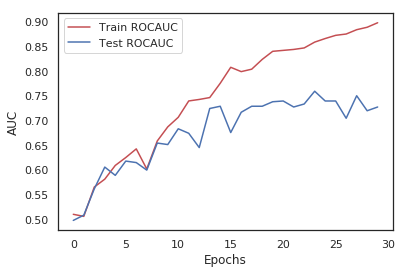

In [0]:
save_bottlebeck_features()
train_top_model()

#Conclusions:

**1: Used VGG16 pretrained network for classification.**

**2: Increased our dataset by using augmentation techniques.**

**3: Trained model for 30 epochs.Our model yield Test accuracy = 0.72 with some overfitting.**

**4: We can use regularization methods like dropouts to reduce overfitting.**